<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/LOWESS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOcally weighted Scatterplot Smoother :

\\

LOWESS is a non-parametric regression (Function shape is not defined uphill) methods that combine multiple regression models in a k-nearest-neighbor-based.  It is used when classical procedures do not perform well.  

It consists in fitting simple models to localized subsets of the data to build up a function that describes the variation in the data, point by point.

Local regression is a memory-based procedure. Like nearest-neighbors, we need all the training data each time we wish to compute a prediction.


Two elements do matter for lowess regression :
1.  Define the regression model to apply on the localized subsets (linear regression, polynomial)
2.  Define the number of points which are considered as being 'Local' to a given 'Focal' point x. This number can be determined using weights obtained by differents methods  :  
    -   a brandwidth parmaeters $\tau$ in case of a bell curve kernell (Explication to follow)
    -   a determined span s
    -   a defined number

We considere more or less a local point by assigning a weight. \\

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! \\
Note that thoses weights are differents from the vector $\bf{W}$ $= [b, w_1]$ used  in Linear regression !!!!!! \\
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! \\

## In details :

Using weighted least squares, we are looking for a linear function that fit only a local set of points delimited by a region. \\

### Weights

As explained uphill , the weights can be obtained in various ways but we will just focus on the brandwidth parameter method. Weights are given by the heights of a kernel function (weighting function) that assign :
* more weights to points near the Focal point x
* less weight to points further away \\

\begin{equation}
v^i = exp(-\frac{(x^i - x)^2}{2\tau^2})
\end{equation}

Where  : \\
$x^i$ represent the  point we are processing the weight (local point) \\
$x$ is the Focal point in our algorithm iteration \\
$\tau$ represent the bandwidth, the larger it is, the bigger is the weight of further points \\
$v^i$ is the processed weight for $x^i$ \\




### applying linear regression model :

Ones we get our weights,  we look for a weighted linear regression  model that suits the best the local dataset. \\

This step is exactly the same that linear regression with this difference that we look for minimizing a weighted least square (Weighted MSE) : \\


\begin{equation}
J(\bf{w}) = \frac{1}{n}\sum_{i = 1}^{n}{v}^{(i)}({y}^{(i)} - \hat{y}^{(i)} )^2,
\end{equation}

* where $\hat{y}^{(i)} =  w_1 x^{(i)} + b$ is the output of $x^{(i)}$ 
* And $v^i$ is the weight associated to $x^i$.

\\



We obtain then a model that fit only the points that are close to the Focal point x. \\
The Focal point then moves away on the x axis and the procedure repeats for each points.





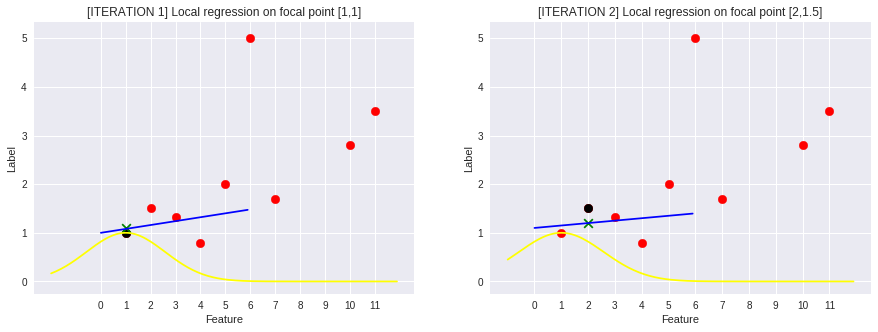

In [48]:
import numpy as np
import matplotlib.pyplot as plt


def kernel_function_plot(X_param, brandwidth):
  return np.exp(-(X_param-1)**2/brandwidth)

bell_line_x = np.arange(-2,12, 0.1)
linReg_line_x = np.arange(0,6, 0.1)

X=np.array([1,2,3,4,5,6,7,10,11])
y=np.array([1,1.5,1.33,0.8,2,5,1.7,2.8,3.5])


################################################################

X_focal=np.array([1])
y_focal=np.array([1])

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)


plt.xticks(range(12))
plt.yticks(range(6))
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('[ITERATION 1] Local regression on focal point [1,1]')
plt.scatter(X,y, marker = 'o', color = 'red', s = 75)
plt.scatter(X_focal,y_focal, marker = 'o', color = 'black', s = 75)

#plotting bell curve function
plt.plot(bell_line_x, kernel_function_plot(bell_line_x,5), color = 'yellow' )

#plotting linear function
plt.plot(linReg_line_x, 0.08*linReg_line_x + 1, color = 'blue' )

#scattering the focal point projection
plt.scatter(1,1.1, marker = 'x', color = 'green', s = 75)

##############################################################""

plt.subplot(1,2,2)

bell_line_x = np.arange(-2,12, 0.1)
linReg_line_x = np.arange(0,6, 0.1)

X_focal=np.array([2])
y_focal=np.array([1.5])

plt.xticks(range(12))
plt.yticks(range(6))
plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('[ITERATION 2] Local regression on focal point [2,1.5]')


plt.scatter(X,y, marker = 'o', color = 'red', s = 75)
plt.scatter(X_focal,y_focal, marker = 'o', color = 'black', s = 75)



#plotting bell curve function
plt.plot(bell_line_x, kernel_function_plot(bell_line_x,5), color = 'yellow' )

#plotting linear function
plt.plot(linReg_line_x, 0.05*linReg_line_x + 1.1, color = 'blue' )

#scattering the focal point projection
plt.scatter(2,1.2, marker = 'x', color = 'green', s = 75)




* Blue plot is the local linear regression
* Yellow one is the weight (kernel) function
* Black point represent the focal point